In [1]:
from s2mosaic import mosaic
from pathlib import Path
import rasterio as rio
from matplotlib import pyplot as plt

We will start by making a mosaic using the visual TCI data

In [2]:
result = mosaic(
    grid_id="50HMH",
    start_year=2022,
    start_month=1,
    start_day=1,
    duration_months=2,
    output_dir=Path("output"),
    sort_method="valid_data",
    mosaic_method="mean",
    required_bands=['visual'],
    no_data_threshold=0.001,
)
print(f"Visual mosaic saved to: {result}")

Scenes: 0/24 | No data: 100.00%

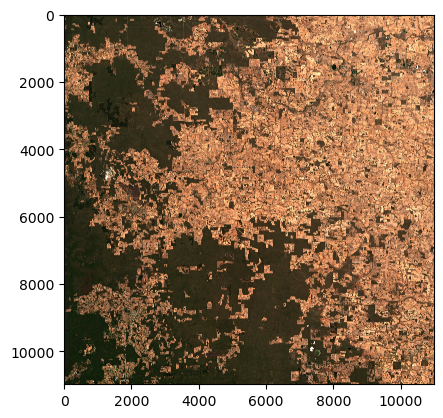

In [3]:
visual_array = rio.open(result).read()
plt.imshow(visual_array.transpose(1, 2, 0))

We can also make a mosaic using the raw bands

In [4]:
required_bands = ["B04", "B03", "B02", "B08"]

array, rio_profile = mosaic(
    grid_id="50HMH",
    start_year=2022,
    start_month=1,
    start_day=1,
    duration_months=2,
    sort_method="valid_data",
    mosaic_method="mean",
    required_bands=required_bands,
    no_data_threshold=0.001
)

print(f"Mosaic array shape: {array.shape}, profile: {rio_profile}")

Scenes: 0/24 | No data: 100.00%

Mosaic array shape: (4, 10980, 10980), profile: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32750), 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 6300040.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


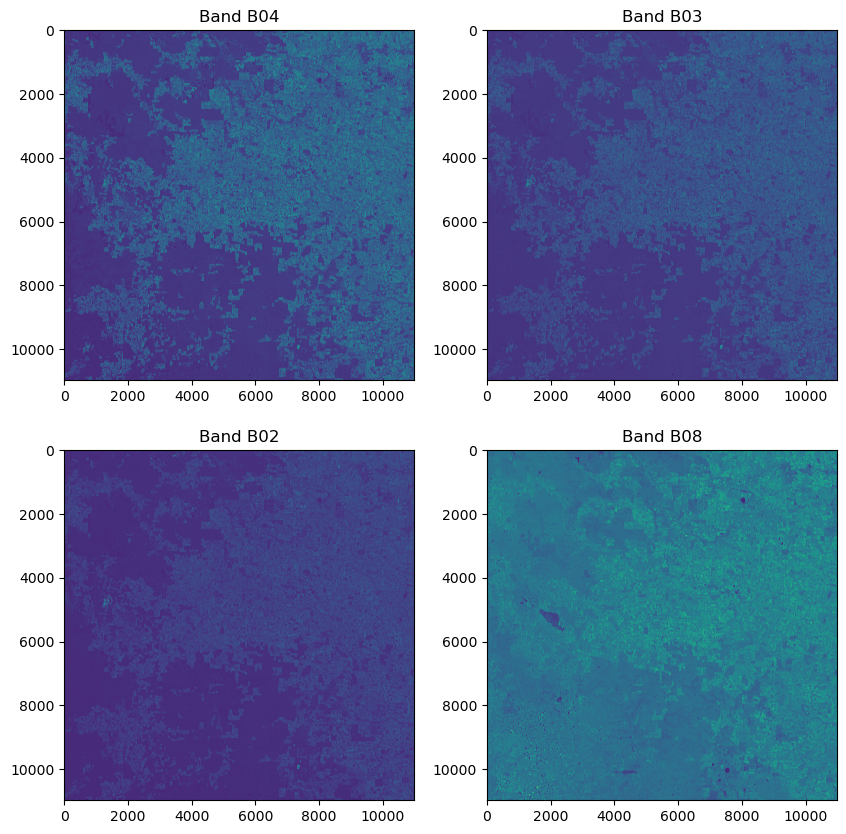

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(array[i, :, :])
    ax.set_title(f"Band {required_bands[i]}")